In [2]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [3]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [4]:
import shutil
import tempfile
import urllib.request
import gzip
import datetime

tmdb_dir = create_subdir(Dataset_directory, "themoviedb")

In [5]:
crew_df = pd.read_msgpack(tmdb_dir + "TMB_crew.msgpack")
cast_df = pd.read_msgpack(tmdb_dir + "TMB_cast.msgpack")
TMB_crew_individuals = pd.read_msgpack(tmdb_dir + "TMB_crew_individuals.msgpack")
TMB_cast_individuals = pd.read_msgpack(tmdb_dir + "TMB_cast_individuals.msgpack")

In [5]:
# cast_crew_aggregates = pd.read_msgpack(tmdb_dir+"TMB_cast_crew_aggregates"+".msgpack")

In [7]:
TMB_crew_individuals[["cast_crew_overlap","adult"]] = TMB_crew_individuals[["cast_crew_overlap","adult"]].astype('float')
TMB_cast_individuals[["cast_crew_overlap","adult"]] = TMB_cast_individuals[["cast_crew_overlap","adult"]].astype('float')

In [45]:
TMB_cast_individuals.columns

Index(['gender', 'id', 'name', 'profile_path', 'credit_list', 'credit_number',
       'mean_order', 'fractional_mean_order', 'order_list', 'gender_guesser',
       'importulence', 'profile_path_cast', 'gender_guess_integrated',
       'cast_crew_overlap', 'adult', 'known_for_department', 'popularity',
       'death_day', 'death_month', 'death_year', 'birth_day', 'birth_month',
       'birth_year'],
      dtype='object')

In [46]:
TMB_crew_individuals.columns

Index(['gender', 'id', 'name', 'profile_path', 'credit_list', 'credit_number',
       'mean_order', 'fractional_mean_order', 'order_list', 'department_list',
       'department_number', 'job_list', 'job_number', 'gender_guesser',
       'importulence', 'gender_guess_integrated', 'cast_crew_overlap', 'adult',
       'known_for_department', 'popularity', 'death_day', 'death_month',
       'death_year', 'birth_day', 'birth_month', 'birth_year'],
      dtype='object')

In [31]:
# birth_df = TMB_cast_individuals[["birth_year","birth_month","birth_day"]][0:1000].copy()
# birth_df.columns = ["year","month","day"]
# birth_df["month"].fillna(7)
# birth_df["day"].fillna(2)

In [27]:
# july 2nd is midpoint of the year to fill in for missing month/days
# years we leave blank!


12.0

In [36]:

# cast_crew_overlap
# adult
# popularity
# born X years before 2000
# dead for X years before 2000

In [37]:
extra_aggregateable_traits = ["cast_crew_overlap","adult","popularity"]
aggregateable_traits = ["credit_number","mean_order","fractional_mean_order","importulence", "gender_guess_integrated"]
crew_only_aggregateable_traits = ["job_number","department_number"]
# mean of whole cast/mean of top X/mean! of top bill person
# for cast and crew
# aggregate by movie

# importulence = TMB_crew_individuals["credit_number"]/TMB_crew_individuals["mean_order"]
# TMB_crew_individuals.head(10)
credit_number_trait = ['credit_number']
stableish_traits = ['gender_guess_integrated']

In [33]:
# aggregateable_traits,crew_only_aggregateable_traits
# aggregateable_traits = ['mean_order',
#   'fractional_mean_order',
#   'importulence']

# Yes, I know, Warchowski bros are kind of important but the data really does not have that resolution!

cast_crew_aggregates = pd.DataFrame(index = crew_df["tmdb_id"].unique())

# median_cast_size = int(INT_df["TMB_cast_size"].median())
# median_crew_size = int(INT_df["TMB_crew_size"].median())


# this is a lie, it's just a hassle to distinguish between cast and crew size at 5/10



In [34]:
for trait in aggregateable_traits:
    print(trait)
    crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
    cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values
    
for trait in crew_only_aggregateable_traits:
    print(trait)
    crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values

credit_number
mean_order
fractional_mean_order
importulence
gender_guess_integrated
cast_crew_overlap
adult
popularity
job_number
department_number


In [35]:
median_cast_size = 5
median_crew_size = 5

In [38]:
%%time 
# 50 mins!
for trait in stableish_traits:
    print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait].mean())
#     cast_crew_aggregates[trait+"_cast"+"_mean"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait].mean())
    
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean())
#     cast_crew_aggregates[trait+"_cast"+"_lead"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean())

#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_crew_size].mean())
#     cast_crew_aggregates[trait+"_cast"+"_lead"+str(median_cast_size)]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_cast_size].mean())

    ### new
    cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    cast_crew_aggregates[trait+"_cast"+"_second"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    

for trait in credit_number_trait:
    print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait].mean()-1)
#     cast_crew_aggregates[trait+"_cast"+"_mean"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait].mean()-1)
    
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean()-1)
#     cast_crew_aggregates[trait+"_cast"+"_lead"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean()-1)

#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_crew_size].mean()-1)
#     cast_crew_aggregates[trait+"_cast"+"_lead"+str(median_cast_size)]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_cast_size].mean()-1)

    ### new
    cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean()-1)
    cast_crew_aggregates[trait+"_cast"+"_second"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean()-1)
    

gender_guess_integrated
credit_number
Wall time: 28min 24s


In [39]:
%%time
# takes ~3hrs

for trait in crew_only_aggregateable_traits: 
    print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())   
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]==0)].mean())
#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]<median_crew_size)].mean())
    
    ### new
    cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    
    

for trait in aggregateable_traits:
    print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())
#     cast_crew_aggregates[trait+"_cast"+"_mean"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())
    
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]==0)].mean())
#     cast_crew_aggregates[trait+"_cast"+"_lead"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]==0)].mean())

#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]<median_crew_size)].mean())
#     cast_crew_aggregates[trait+"_cast"+"_lead"+str(median_cast_size)]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]<median_crew_size)].mean())

    ### new
    cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    cast_crew_aggregates[trait+"_cast"+"_second"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    

job_number
department_number
credit_number
mean_order
fractional_mean_order
importulence
gender_guess_integrated
Wall time: 1h 28min 38s


In [ ]:
##########################

In [ ]:
# %%time 
# # 50 mins!
# for trait in stableish_traits:
#     print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait].mean())
#     cast_crew_aggregates[trait+"_cast"+"_mean"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait].mean())
    
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean())
#     cast_crew_aggregates[trait+"_cast"+"_lead"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean())

#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_crew_size].mean())
#     cast_crew_aggregates[trait+"_cast"+"_lead"+str(median_cast_size)]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_cast_size].mean())

#     ### new
#     cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
#     cast_crew_aggregates[trait+"_cast"+"_second"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    

# for trait in credit_number_trait:
#     print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait].mean()-1)
#     cast_crew_aggregates[trait+"_cast"+"_mean"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait].mean()-1)
    
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean()-1)
#     cast_crew_aggregates[trait+"_cast"+"_lead"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==0].mean()-1)

#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_crew_size].mean()-1)
#     cast_crew_aggregates[trait+"_cast"+"_lead"+str(median_cast_size)]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]<median_cast_size].mean()-1)

#     ### new
#     cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean()-1)
#     cast_crew_aggregates[trait+"_cast"+"_second"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean()-1)
    

In [40]:
for trait in extra_aggregateable_traits:
    print(trait)
    crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
    cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values

cast_crew_overlap
adult
popularity


In [41]:
%%time
# takes ~3hrs

# for trait in crew_only_aggregateable_traits: 
#     print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())   
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]==0)].mean())
#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]<median_crew_size)].mean())
    
#     ### new
#     cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    
    
    

for trait in extra_aggregateable_traits:
    print(trait)
    cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())
    cast_crew_aggregates[trait+"_cast"+"_mean"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())
    
    cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]==0)].mean())
    cast_crew_aggregates[trait+"_cast"+"_lead"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]==0)].mean())

    cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]<median_crew_size)].mean())
    cast_crew_aggregates[trait+"_cast"+"_lead"+str(median_cast_size)]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]<median_crew_size)].mean())

    ### new
    cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    cast_crew_aggregates[trait+"_cast"+"_second"]  = cast_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    

cast_crew_overlap
adult
popularity
Wall time: 3h 38min 50s


In [42]:
cast_crew_aggregates.isnull().sum()

gender_guess_integrated_crew_second    152781
gender_guess_integrated_cast_second    109224
credit_number_crew_second              128468
credit_number_cast_second               91400
job_number_crew_second                 128468
department_number_crew_second          128468
mean_order_crew_second                 128468
mean_order_cast_second                  91400
fractional_mean_order_crew_second      128468
fractional_mean_order_cast_second       91400
importulence_crew_second               128468
importulence_cast_second                91400
cast_crew_overlap_crew_mean             31261
cast_crew_overlap_cast_mean             97844
cast_crew_overlap_crew_lead             44610
cast_crew_overlap_cast_lead            256410
cast_crew_overlap_crew_lead5            31559
cast_crew_overlap_cast_lead5           100301
cast_crew_overlap_crew_second          128468
cast_crew_overlap_cast_second           91400
adult_crew_mean                         31261
adult_cast_mean                   

In [44]:
secondary_tmdb_dir = "e:\\Datasets\\themoviedb\\"
cast_crew_aggregates.to_msgpack(secondary_tmdb_dir+"TMB_cast_crew_aggregates_addendum1"+".msgpack")

In [ ]:
### now get age_since/death_since/lifespan!

In [341]:
birth_df = TMB_cast_individuals[["birth_year","birth_month","birth_day"]].copy()
birth_df.columns = ["year","month","day"]
birth_df["month"] = birth_df["month"].fillna(7)
birth_df["day"] = birth_df["day"].fillna(2)
birth_df = birth_df.dropna().astype('int')
birth_dates = pd.to_datetime(birth_df,errors='coerce')
birth_dates = birth_dates.dropna()
# dropping dates out of the range 1677-2062 # https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-timestamp-limits
del birth_df

death_df = TMB_cast_individuals[["death_year","death_month","death_day"]].copy()
death_df.columns = ["year","month","day"]
death_df["month"] = death_df["month"].fillna(7)
death_df["day"] = death_df["day"].fillna(2)
death_df = death_df.dropna().astype('int')
death_dates = pd.to_datetime(death_df,errors='coerce').dropna()
# dropping dates out of the range 1677-2062 # https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-timestamp-limits
del death_df

from dateutil.relativedelta import relativedelta

def yrs_rel_1900(date):
    ref_date = datetime.datetime(1900,1,1,0,0,0,0)
    difference = relativedelta(date, ref_date)
    return difference.years + (difference.months/12) + (difference.days/365.25)

birth_yrs_rel_1900 = birth_dates.apply(lambda x: yrs_rel_1900(x))
death_yrs_rel_1900 = death_dates.apply(lambda x: yrs_rel_1900(x))
life_spans = death_yrs_rel_1900 - birth_yrs_rel_1900

In [342]:
life_spans.notnull().sum(), life_spans.min(), life_spans.max()

(27504, 3.3333333333333286, 110.2417864476386)

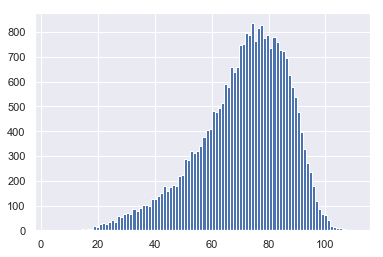

In [343]:
life_spans.hist(bins=100); ## looks reasonable!

In [314]:
TMB_cast_individuals.loc[1707,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Stuart Beattie not dead!

TMB_cast_individuals.loc[28729,["birth_day","birth_month","birth_year"]] = [30,6 ,1951] # André Hazes=s born 30 June 1951
TMB_cast_individuals.loc[28729,"gender"] = 2

TMB_cast_individuals.loc[29589,["birth_day","birth_month","birth_year"]] = [20,4 ,1868] # Sheldon Lewis (April 20, 1868 - May 7, 1958)
TMB_cast_individuals.loc[29589,"gender"] = 2

TMB_cast_individuals.loc[37136,["birth_day","birth_month","birth_year"]] = [1 ,4 ,1882] # Julienne Paroli est une actrice française née le 1er avril 1882
TMB_cast_individuals.loc[29589,"gender"] = 1
TMB_cast_individuals.loc[37537,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Dorit Gabler not dead
TMB_cast_individuals.loc[55703,["death_day","death_month","death_year"]] = [27,2,2012] # Wallace Earl death date wrong
TMB_cast_individuals.loc[69545,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Manu Katché not dead!
TMB_cast_individuals.loc[132193,["birth_day","birth_month","birth_year"]] = [21 ,2 ,1911] # Pietro de Vico Born: 21 February 1911
TMB_cast_individuals.loc[143818,["birth_day","birth_month","birth_year"]] = [14 ,9 ,1904] # Flora Bramley Born: 14/9/1904
TMB_cast_individuals.loc[153738,["birth_day","birth_month","birth_year"]] = [21 ,4 ,1882] # "True Boardman" Born: 21/4/1882

TMB_cast_individuals.loc[233717,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Márta Mészáros not dead!

# solves 14!
# identical birth/death dates => accidentially copying birth date into death date
# so far, manual inspection has had *all* of these be erroneous death dates added to people who are alive
identical_birth_death_dates = (birth_dates[birth_dates.notnull()&death_dates.notnull()]==death_dates[birth_dates.notnull()&death_dates.notnull()])
identical_birth_death_dates[identical_birth_death_dates].index
TMB_cast_individuals.loc[identical_birth_death_dates[identical_birth_death_dates].index, ["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan]

# birth date after death date => one century too late in birth date
born_after_death = (birth_dates[birth_dates.notnull()&death_dates.notnull()]>death_dates[birth_dates.notnull()&death_dates.notnull()])
TMB_cast_individuals.loc[born_after_death[born_after_death].index, "birth_year"] = TMB_cast_individuals.loc[identical_birth_death_dates[identical_birth_death_dates].index, "birth_year"]-100



TMB_cast_individuals.loc[577610,["birth_day","birth_month","birth_year"]] = [16 ,12,1862] # John Fox Jr. Born: 16/12/1862
TMB_cast_individuals.loc[588737,["birth_day","birth_month","birth_year"]] = [14 ,7 ,1881] # Olga Preobrazhenskaya Born: 24/7/1881
TMB_cast_individuals.loc[1043398,["birth_day","birth_month","birth_year"]] = [1 ,9 ,1877] # Jeanne Marie-Laurent	 Born: 1/9/1877

TMB_cast_individuals.loc[1362100,["death_day","death_month","death_year"]] = [3,8,1988] # Frans Andersson Died: 3 August 1988, Denmark


In [315]:
TMB_cast_individuals.loc[590428,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[21,9,1937, 24,1,2013]
# Born: 21 September 1937, Rio de Janeiro, State of Rio de Janeiro, Brazil
# Died: 24 January 2013, Rio de Janeiro, State of Rio de Janeiro, Brazil

TMB_cast_individuals.loc[936052,["birth_day","birth_month","birth_year"]]\
    =[11,5,1937]
# Born: 11 May 1937 (age 82 years), Moscow, Russia

TMB_cast_individuals.loc[1176976,["birth_day","birth_month","birth_year"]]\
    =[12,1,1935]
# Born: 12 January 1935 (age 84 years)

TMB_cast_individuals.loc[1196086,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[22,6,1942, 10,8,2000]
# Born: 22 June 1942, Chernogorsk, Russia
# Died: 10 August 2000, Sofia, Bulgaria

TMB_cast_individuals.loc[1587808,["birth_day","birth_month","birth_year"]]\
    =[4,4,1982]
# Born: 4 April 1982 (age 37 years), Bogotá, Colombia

TMB_cast_individuals.loc[2076119,["birth_day","birth_month","birth_year"]]\
    =[24,9,1980]
# Born: 24 September 1980 (age 38 years), Stotfold

TMB_cast_individuals.loc[2294474,["birth_day","birth_month","birth_year"]]\
    =[14,4,1976]
# Born: 14 April 1976 (age 43 years)

In [316]:
TMB_cast_individuals.loc[35819,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[14,8,1957, np.nan,np.nan,np.nan]
# Born: 14 August 1957 (age 61 years), Kanigiri, India

TMB_cast_individuals.loc[41119,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[3,3,1933, 15,2,2004]
# Born: 3 March 1933, Ravenna, Italy
# Died: 15 February 2004, Rome, Italy

TMB_cast_individuals.loc[133246,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[3,7,1914, 27,3,1992]
# Born: 3 July 1914, London
# Died: 27 March 1992, London


TMB_cast_individuals.loc[545801,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[8,3,1922, 1,6,2003]
TMB_cast_individuals.loc[545801,"gender"] = 2
# Born	Yevgeny Semyonovich Matveyev 8 March 1922
# Novoukrainka, Kherson Oblast, Ukrainian SSR Died	1 June 2003 (aged 81)

TMB_cast_individuals.loc[1039088,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[26,7,1920, 25,3,1983]
# born on July 26, 1920 in Elmira, New York, USA
# died on March 25, 1983 

TMB_cast_individuals.loc[1188293,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[12,5,1911, 22,2,1933]
TMB_cast_individuals.loc[1188293,"gender"] = 1
# Ilse Korseck	Born: 12 May 1911, Wrocław, Poland
# Ilse Korseck	Died: 22 February 1933, Potsdam, Germany

TMB_cast_individuals.loc[5034,"gender"] = 1
# 5034	0	Brigitte Borchert

TMB_cast_individuals.loc[1310218,["birth_day","birth_month","birth_year"]]\
    =[22,5,1979]
# Born: 22 May 1979, Chamonix, France

In [320]:
TMB_cast_individuals.loc[233169,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[1,1,1962, np.nan,np.nan,np.nan]
# Kürşat Alnıaçık
# Born: January 1, 1962 

TMB_cast_individuals.loc[237763,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[23,10,1899, 13,3,1964]
# Robert Arnoux
# Born: October 23, 1899, Lille, France
# Died: March 13, 1964, 16th arrondissement of Paris, Paris, France

TMB_cast_individuals.loc[572505,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[25,7,1936, np.nan,np.nan,1993]
TMB_cast_individuals.loc[572505,"gender"] = 2
# Aleksandr Fadeyev (Actor)
# Born: July 25, 1936
# Died: 1993, Russia

TMB_cast_individuals.loc[1455826,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[28,4,1941, 10,6,2015]
TMB_cast_individuals.loc[1455826,"gender"] = 2
# Georgy Drozd
# Born: May 28, 1941, Kyiv, Ukraine
# Died: June 10, 2015, Kyiv, Ukraine

TMB_cast_individuals.loc[1729583,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1857, 20,4,1917]
# George D. Melville (Actor)
# Born: 1857, Valparaíso, Chile
# Died: May 20, 1917, Jersey City, New Jersey, United States

TMB_cast_individuals.loc[1820938,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[7,2,1897, np.nan,np.nan,1975]
# Anastasia Filippova (Film actor)
# Born: February 7, 1897
# Died: 1975

In [324]:
## copied across from crew notifications

TMB_cast_individuals.loc[125440,["birth_day","birth_month","birth_year"]]\
    =[23,4,1971]
# Ferenc Török	Born: 23 April 1971 (age 48 years), Budapest, Hungary

TMB_cast_individuals.loc[1631599,["birth_day","birth_month","birth_year"]]\
    =[15,8,1975]
# Andrea Ajemian	Born: 15 August 1975

TMB_cast_individuals.loc[2020037,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1974, 28,7,2015]
# Shawn Robinson	Born	1974
#                   Died	July 28, 2015

TMB_cast_individuals.loc[68113,["birth_day","birth_month","birth_year"]]\
    =[19,2,1952]
# Ryû Murakami		19 February 1952

TMB_cast_individuals.loc[88355,["birth_day","birth_month","birth_year"]]\
    =[6,3,1980]
TMB_cast_individuals.loc[88355,"gender"] = 2
# Michael Schøt		Born: 6 March 1980

TMB_cast_individuals.loc[147653,["birth_day","birth_month","birth_year"]]\
    =[7,2,1969]
TMB_cast_individuals.loc[147653,"gender"] = 2
# Jeff Kosloski		Born: 7 February 1969

TMB_cast_individuals.loc[1143488,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,np.nan, 8,3,2009]
# 1143488	2.0	Gengon Nakaoka	 Died: 8 March 2009,

TMB_cast_individuals.loc[2338015,["death_day","death_month","death_year"]] = [24,4,1852]
# 2338015	2.0	Vasily Zhukovsky

TMB_cast_individuals.loc[1379089,"gender"] = 1
# 1379089	0.0	Frederica Sagor	

TMB_cast_individuals.loc[2342007,["death_day","death_month","death_year"]] = [3,1,1911]
# 2342007	2.0	Alexandros Papadiamantis

TMB_cast_individuals.loc[233200,["birth_day","birth_month","birth_year"]]\
    =[10,10,1906]
# Fei Mu
# Born: 10 October 1906, Shanghai, China
# Died: 31 January 1951, British Hong Kong


In [340]:
TMB_cast_individuals.loc[1401,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[18,4,1940, 22,2,2012]
TMB_cast_individuals.loc[572505,"gender"] = 1
# Elżbieta Kurkowska
# Born: April 18, 1940, Warsaw, Poland
# Died: February 22, 2012, Warsaw, Poland
# Nominations: Polish Academy Award for Best Editing

TMB_cast_individuals.loc[1335446,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[17,4,1882, np.nan,np.nan,1961]
# Thea Červenková
# Born: May 17, 1882, Prague, Czechia
# Died: 1961, São Paulo, State of São Paulo, Brazil

TMB_cast_individuals.loc[1624520,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[21,9,1911, np.nan,np.nan,1990]
# Dmitri Flyangolts	
# Born: September 21, 1911
# Died: 1990 (age 78)

TMB_cast_individuals.loc[1624520,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1890, 28,7,1964]
# Dimitris Bogris
# Born: 1890, Salamis Island, Greece
# Died: July 28, 1964, Athens, Greece

In [317]:
# id = 932424, Joshu ???
# id = 2064818, Zackary Behm ???
# id = 2178935, Miles Stephens ???
# 1465889	2	Koko ??? I think Koko is a dog!
# 1550538	0	SPK ??? Surgical Penis Klinik?
# 1650158	1	Nellie	/xZ51tobwIxoNqAaldt71l25uqEP.jpg Nellie the dog!
# 2182724	2	Bart the Bear	/cpioZQgfeZ78AhHN9ii6U2T1ftj.jpg literally a bear!
# 1135598	0	Rin-Tin-Tin	/o8NXfyipzug9W9m8Efv5OPNwUP7.jpg	 dog!
# 1179846	0	Terry	/essS3wClkUyA8LL1IoOrlawn96P.jpg -> dog!
# 1935487	2	Excellent	/hBnxXu3tYeIRTGtgmjXgIqu599A.jpg	

In [318]:
TMB_cast_individuals.loc[ life_spans[(life_spans>110)|(life_spans<10)].index ][["gender","name","profile_path","birth_day","birth_month","birth_year","death_day","death_month","death_year"]]

,gender,name,profile_path,birth_day,birth_month,birth_year,death_day,death_month,death_year
id,,,,,,,,,
223503,2,The Clash,/yHplm1M0l2Ubb0tIPtzdUbDIA2h.jpg,4.0,7.0,1976.0,NaN,NaN,1985.0
233169,2,Kürşat Alnıaçık,/zMX3x8UezpfrZT8L1KAdTVIflmA.jpg,NaN,NaN,1962.0,NaN,NaN,NaN
237763,2,Robert Arnoux,/8hBONmjpWkhdL1sUytSOjsQe4os.jpg,NaN,NaN,NaN,NaN,NaN,1964.0
572505,0,Aleksandr Fadeyev,/cM6KgSSIcm9s1YGK9CNe1EU9xu5.jpg,25.0,7.0,NaN,NaN,NaN,1933.0
1284980,1,Alice Sommer-Herz,NaN,26.0,11.0,1903.0,23.0,2.0,2014.0
1455826,0,Georgy Drozd,NaN,NaN,NaN,NaN,3.0,1.0,1900.0
1465889,2,Koko,NaN,9.0,4.0,2005.0,18.0,12.0,2012.0
1650158,1,Nellie,/xZ51tobwIxoNqAaldt71l25uqEP.jpg,20.0,5.0,2008.0,20.0,3.0,2016.0
1729583,2,George D. Melville,NaN,NaN,NaN,NaN,20.0,5.0,1917.0


In [319]:
## hmm quite a few errors
TMB_cast_individuals.loc[ birth_yrs_rel_1900[birth_yrs_rel_1900>115].index ][["gender","name","profile_path","birth_day","birth_month","birth_year","death_day","death_month","death_year"]]


,gender,name,profile_path,birth_day,birth_month,birth_year,death_day,death_month,death_year
id,,,,,,,,,
932424,2,Joshu,NaN,18.0,9.0,2018.0,NaN,NaN,NaN
1463206,0,Jody Quigley,/dgjYO7aHdHdVM0OSkDnNdieNUTj.jpg,21.0,6.0,2015.0,NaN,NaN,NaN
2064818,2,Zackary Behm,NaN,30.0,11.0,2018.0,NaN,NaN,NaN
2112217,1,Scarlett Lindsey,NaN,12.0,7.0,2016.0,NaN,NaN,NaN
2124469,2,Kaelan Kelly,NaN,25.0,11.0,2017.0,NaN,NaN,NaN
2178934,1,Luna Stephens,NaN,14.0,4.0,2016.0,NaN,NaN,NaN
2178935,2,Miles Stephens,NaN,17.0,5.0,2018.0,NaN,NaN,NaN
2216138,1,Daniel Getmanskaya,/eSFsgybV6ZYxaeSvpY9kbW8oK6v.jpg,9.0,1.0,2015.0,NaN,NaN,NaN
2347508,1,Princess Charlotte of Cambridge,NaN,2.0,5.0,2015.0,NaN,NaN,NaN


In [251]:
# TMB_cast_individuals.columns

In [252]:
# TMB_cast_individuals.head(10)

In [344]:
TMB_cast_individuals["birth_yrs_rel_1900"] = birth_yrs_rel_1900
TMB_cast_individuals["death_yrs_rel_1900"] = death_yrs_rel_1900
TMB_cast_individuals["life_span"] = life_spans
TMB_cast_individuals.to_msgpack(tmdb_dir + "TMB_cast_individuals.msgpack")

In [ ]:
#########################################################

In [345]:
birth_df = TMB_crew_individuals[["birth_year","birth_month","birth_day"]].copy()
birth_df.columns = ["year","month","day"]
birth_df["month"] = birth_df["month"].fillna(7)
birth_df["day"] = birth_df["day"].fillna(2)
birth_df = birth_df.dropna().astype('int')
birth_dates = pd.to_datetime(birth_df,errors='coerce')
birth_dates = birth_dates.dropna()
# dropping dates out of the range 1677-2062 # https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-timestamp-limits
del birth_df

death_df = TMB_crew_individuals[["death_year","death_month","death_day"]].copy()
death_df.columns = ["year","month","day"]
death_df["month"] = death_df["month"].fillna(7)
death_df["day"] = death_df["day"].fillna(2)
death_df = death_df.dropna().astype('int')
death_dates = pd.to_datetime(death_df,errors='coerce').dropna()
# dropping dates out of the range 1677-2062 # https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-timestamp-limits
del death_df

from dateutil.relativedelta import relativedelta

def yrs_rel_1900(date):
    ref_date = datetime.datetime(1900,1,1,0,0,0,0)
    difference = relativedelta(date, ref_date)
    return difference.years + (difference.months/12) + (difference.days/365.25)

birth_yrs_rel_1900 = birth_dates.apply(lambda x: yrs_rel_1900(x))
death_yrs_rel_1900 = death_dates.apply(lambda x: yrs_rel_1900(x))
life_spans = death_yrs_rel_1900 - birth_yrs_rel_1900

In [346]:
life_spans.notnull().sum(), life_spans.min(), life_spans.max()

(13637, 10.0, 116.41666666666667)

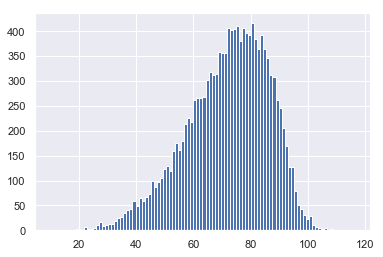

In [347]:
life_spans.hist(bins=100); ## looks reasonable!

In [348]:
TMB_crew_individuals.loc[1707,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Stuart Beattie not dead!
TMB_crew_individuals.loc[28729,["birth_day","birth_month","birth_year"]] = [30,6 ,1951] # André Hazes=s born 30 June 1951
TMB_crew_individuals.loc[28729,"gender"] = 2
TMB_crew_individuals.loc[29589,["birth_day","birth_month","birth_year"]] = [20,4 ,1868] # Sheldon Lewis (April 20, 1868 - May 7, 1958)
TMB_crew_individuals.loc[29589,"gender"] = 2
TMB_crew_individuals.loc[37136,["birth_day","birth_month","birth_year"]] = [1 ,4 ,1882] # Julienne Paroli est une actrice française née le 1er avril 1882
TMB_crew_individuals.loc[29589,"gender"] = 1
TMB_crew_individuals.loc[37537,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Dorit Gabler not dead
TMB_crew_individuals.loc[55703,["death_day","death_month","death_year"]] = [27,2,2012] # Wallace Earl death date wrong
TMB_crew_individuals.loc[69545,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Manu Katché not dead!
TMB_crew_individuals.loc[132193,["birth_day","birth_month","birth_year"]] = [21 ,2 ,1911] # Pietro de Vico Born: 21 February 1911
TMB_crew_individuals.loc[143818,["birth_day","birth_month","birth_year"]] = [14 ,9 ,1904] # Flora Bramley Born: 14/9/1904
TMB_crew_individuals.loc[153738,["birth_day","birth_month","birth_year"]] = [21 ,4 ,1882] # "True Boardman" Born: 21/4/1882

TMB_crew_individuals.loc[233717,["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan] # Márta Mészáros not dead!

# solves 14!
# identical birth/death dates => accidentially copying birth date into death date
# so far, manual inspection has had *all* of these be erroneous death dates added to people who are alive
identical_birth_death_dates = (birth_dates[birth_dates.notnull()&death_dates.notnull()]==death_dates[birth_dates.notnull()&death_dates.notnull()])
identical_birth_death_dates[identical_birth_death_dates].index
TMB_crew_individuals.loc[identical_birth_death_dates[identical_birth_death_dates].index, ["death_day","death_month","death_year"]] = [np.nan,np.nan,np.nan]

# birth date after death date => one century too late in birth date
born_after_death = (birth_dates[birth_dates.notnull()&death_dates.notnull()]>death_dates[birth_dates.notnull()&death_dates.notnull()])
TMB_crew_individuals.loc[born_after_death[born_after_death].index, "birth_year"] = TMB_crew_individuals.loc[identical_birth_death_dates[identical_birth_death_dates].index, "birth_year"]-100



TMB_crew_individuals.loc[577610,["birth_day","birth_month","birth_year"]] = [16 ,12,1862] # John Fox Jr. Born: 16/12/1862
TMB_crew_individuals.loc[588737,["birth_day","birth_month","birth_year"]] = [14 ,7 ,1881] # Olga Preobrazhenskaya Born: 24/7/1881
TMB_crew_individuals.loc[1043398,["birth_day","birth_month","birth_year"]] = [1 ,9 ,1877] # Jeanne Marie-Laurent	 Born: 1/9/1877

TMB_crew_individuals.loc[1362100,["death_day","death_month","death_year"]] = [3,8,1988] # Frans Andersson Died: 3 August 1988, Denmark


TMB_crew_individuals.loc[590428,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[21,9,1937, 24,1,2013]
# Born: 21 September 1937, Rio de Janeiro, State of Rio de Janeiro, Brazil
# Died: 24 January 2013, Rio de Janeiro, State of Rio de Janeiro, Brazil

TMB_crew_individuals.loc[936052,["birth_day","birth_month","birth_year"]]\
    =[11,5,1937]
# Born: 11 May 1937 (age 82 years), Moscow, Russia

TMB_crew_individuals.loc[1176976,["birth_day","birth_month","birth_year"]]\
    =[12,1,1935]
# Born: 12 January 1935 (age 84 years)

TMB_crew_individuals.loc[1196086,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[22,6,1942, 10,8,2000]
# Born: 22 June 1942, Chernogorsk, Russia
# Died: 10 August 2000, Sofia, Bulgaria

TMB_crew_individuals.loc[1587808,["birth_day","birth_month","birth_year"]]\
    =[4,4,1982]
# Born: 4 April 1982 (age 37 years), Bogotá, Colombia

TMB_crew_individuals.loc[2076119,["birth_day","birth_month","birth_year"]]\
    =[24,9,1980]
# Born: 24 September 1980 (age 38 years), Stotfold

TMB_crew_individuals.loc[2294474,["birth_day","birth_month","birth_year"]]\
    =[14,4,1976]
# Born: 14 April 1976 (age 43 years)



TMB_crew_individuals.loc[35819,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[14,8,1957, np.nan,np.nan,np.nan]
# Born: 14 August 1957 (age 61 years), Kanigiri, India

TMB_crew_individuals.loc[41119,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[3,3,1933, 15,2,2004]
# Born: 3 March 1933, Ravenna, Italy
# Died: 15 February 2004, Rome, Italy

TMB_crew_individuals.loc[133246,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[3,7,1914, 27,3,1992]
# Born: 3 July 1914, London
# Died: 27 March 1992, London


TMB_crew_individuals.loc[545801,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[8,3,1922, 1,6,2003]
TMB_crew_individuals.loc[545801,"gender"] = 2
# Born	Yevgeny Semyonovich Matveyev 8 March 1922
# Novoukrainka, Kherson Oblast, Ukrainian SSR Died	1 June 2003 (aged 81)

TMB_crew_individuals.loc[1039088,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[26,7,1920, 25,3,1983]
# born on July 26, 1920 in Elmira, New York, USA
# died on March 25, 1983 

TMB_crew_individuals.loc[1188293,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[12,5,1911, 22,2,1933]
TMB_crew_individuals.loc[1188293,"gender"] = 1
# Ilse Korseck	Born: 12 May 1911, Wrocław, Poland
# Ilse Korseck	Died: 22 February 1933, Potsdam, Germany

TMB_crew_individuals.loc[5034,"gender"] = 1
# 5034	0	Brigitte Borchert

TMB_crew_individuals.loc[1310218,["birth_day","birth_month","birth_year"]]\
    =[22,5,1979]
# Born: 22 May 1979, Chamonix, France


In [333]:
TMB_crew_individuals.loc[125440,["birth_day","birth_month","birth_year"]]\
    =[23,4,1971]
# Ferenc Török	Born: 23 April 1971 (age 48 years), Budapest, Hungary

TMB_crew_individuals.loc[1631599,["birth_day","birth_month","birth_year"]]\
    =[15,8,1975]
# Andrea Ajemian	Born: 15 August 1975

TMB_crew_individuals.loc[2020037,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1974, 28,7,2015]
# Shawn Robinson	Born	1974
#                   Died	July 28, 2015

TMB_crew_individuals.loc[68113,["birth_day","birth_month","birth_year"]]\
    =[19,2,1952]
# Ryû Murakami		19 February 1952

TMB_crew_individuals.loc[88355,["birth_day","birth_month","birth_year"]]\
    =[6,3,1980]
TMB_crew_individuals.loc[88355,"gender"] = 2
# Michael Schøt		Born: 6 March 1980

TMB_crew_individuals.loc[147653,["birth_day","birth_month","birth_year"]]\
    =[7,2,1969]
TMB_crew_individuals.loc[147653,"gender"] = 2
# Jeff Kosloski		Born: 7 February 1969

TMB_crew_individuals.loc[1143488,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,np.nan, 8,3,2009]
# 1143488	2.0	Gengon Nakaoka	 Died: 8 March 2009,

TMB_crew_individuals.loc[2338015,["death_day","death_month","death_year"]] = [24,4,1852]
# 2338015	2.0	Vasily Zhukovsky

TMB_crew_individuals.loc[1379089,"gender"] = 1
# 1379089	0.0	Frederica Sagor	

TMB_crew_individuals.loc[2342007,["death_day","death_month","death_year"]] = [3,1,1911]
# 2342007	2.0	Alexandros Papadiamantis

TMB_crew_individuals.loc[233200,["birth_day","birth_month","birth_year"]]\
    =[10,10,1906]
# Fei Mu
# Born: 10 October 1906, Shanghai, China
# Died: 31 January 1951, British Hong Kong


In [334]:
# copied from cast section

TMB_crew_individuals.loc[233169,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[1,1,1962, np.nan,np.nan,np.nan]
# Kürşat Alnıaçık
# Born: January 1, 1962 

TMB_crew_individuals.loc[237763,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[23,10,1899, 13,3,1964]
# Robert Arnoux
# Born: October 23, 1899, Lille, France
# Died: March 13, 1964, 16th arrondissement of Paris, Paris, France

TMB_crew_individuals.loc[572505,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[25,7,1936, np.nan,np.nan,1993]
TMB_crew_individuals.loc[572505,"gender"] = 2
# Aleksandr Fadeyev (Actor)
# Born: July 25, 1936
# Died: 1993, Russia

TMB_crew_individuals.loc[1455826,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[28,4,1941, 10,6,2015]
TMB_crew_individuals.loc[1455826,"gender"] = 2
# Georgy Drozd
# Born: May 28, 1941, Kyiv, Ukraine
# Died: June 10, 2015, Kyiv, Ukraine

TMB_crew_individuals.loc[1729583,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1857, 20,4,1917]
# George D. Melville (Actor)
# Born: 1857, Valparaíso, Chile
# Died: May 20, 1917, Jersey City, New Jersey, United States

TMB_crew_individuals.loc[1820938,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[7,2,1897, np.nan,np.nan,1975]
# Anastasia Filippova (Film actor)
# Born: February 7, 1897
# Died: 1975

In [339]:
TMB_crew_individuals.loc[1401,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[18,4,1940, 22,2,2012]
TMB_crew_individuals.loc[572505,"gender"] = 1
# Elżbieta Kurkowska
# Born: April 18, 1940, Warsaw, Poland
# Died: February 22, 2012, Warsaw, Poland
# Nominations: Polish Academy Award for Best Editing

TMB_crew_individuals.loc[1335446,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[17,4,1882, np.nan,np.nan,1961]
# Thea Červenková
# Born: May 17, 1882, Prague, Czechia
# Died: 1961, São Paulo, State of São Paulo, Brazil

TMB_crew_individuals.loc[1624520,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[21,9,1911, np.nan,np.nan,1990]
# Dmitri Flyangolts	
# Born: September 21, 1911
# Died: 1990 (age 78)

TMB_crew_individuals.loc[1624520,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1890, 28,7,1964]
# Dimitris Bogris
# Born: 1890, Salamis Island, Greece
# Died: July 28, 1964, Athens, Greece

In [337]:
TMB_crew_individuals.loc[ life_spans[(life_spans<15)|(life_spans>110)].index ][["gender","name","profile_path","birth_day","birth_month","birth_year","death_day","death_month","death_year"]]

,gender,name,profile_path,birth_day,birth_month,birth_year,death_day,death_month,death_year
id,,,,,,,,,
1401,0.0,Elżbieta Kurkowska,NaN,NaN,NaN,NaN,22.0,2.0,1912.0
1043960,2.0,Dean McKendrick,NaN,6.0,12.0,1901.0,6.0,5.0,2018.0
1335446,1.0,Thea Červenková,NaN,17.0,5.0,NaN,NaN,NaN,1961.0
1379089,1.0,Frederica Sagor,NaN,6.0,7.0,1900.0,5.0,1.0,2012.0
1550538,0.0,SPK,/h5oa4V6PJtXK3SM1NtoGgnGhDR8.jpg,1.0,4.0,1978.0,1.0,4.0,1988.0
1624520,2.0,Dmitri Flyangolts,NaN,21.0,9.0,1977.0,NaN,NaN,1990.0
1635433,2.0,Dimitris Bogris,NaN,NaN,NaN,NaN,28.0,7.0,1964.0
1976453,2.0,Bessi Þór Sigurðarson,NaN,30.0,11.0,1998.0,16.0,7.0,2011.0


In [338]:
## hmm quite a few errors
TMB_crew_individuals.loc[ birth_yrs_rel_1900[birth_yrs_rel_1900>106].index ][["gender","name","profile_path","birth_day","birth_month","birth_year","death_day","death_month","death_year"]]


,gender,name,profile_path,birth_day,birth_month,birth_year,death_day,death_month,death_year
id,,,,,,,,,
229254,2.0,Ruy Polanah,/kTZMGkLRTS7Y1PqpIh7wU3yEu4Y.jpg,3.0,9.0,2008.0,NaN,NaN,NaN
240250,0.0,Jurgen Deleye,/wuF1JslHQK2PAHx3Qy4g05B9POS.jpg,18.0,8.0,2011.0,NaN,NaN,NaN
1335071,0.0,Jesus G. Duran,NaN,7.0,1.0,2010.0,NaN,NaN,NaN
1578048,0.0,Calibro 35,NaN,NaN,NaN,2007.0,NaN,NaN,NaN
1634010,2.0,Julian Grey,/gW2NSfgrmJuxjAdjK0n2Son6fz1.jpg,1.0,3.0,2006.0,NaN,NaN,NaN
1704640,1.0,Brooklynn Prince,/47fAcFO1YZfjEGvhLps2a2HlNJ2.jpg,NaN,NaN,2010.0,NaN,NaN,NaN
1965939,2.0,Parker Bates,/lT0jkWLwWIfWJq1gj03QadUGjXE.jpg,1.0,3.0,2007.0,NaN,NaN,NaN
2009542,1.0,Mariya Lobanova,/oGPBfD5NMzhi6h3m6J32iR6Um6F.jpg,8.0,4.0,2006.0,NaN,NaN,NaN
2064818,2.0,Zackary Behm,NaN,30.0,11.0,2018.0,NaN,NaN,NaN


In [349]:
TMB_crew_individuals["birth_yrs_rel_1900"] = birth_yrs_rel_1900
TMB_crew_individuals["death_yrs_rel_1900"] = death_yrs_rel_1900
TMB_crew_individuals["life_span"] = life_spans
TMB_crew_individuals.to_msgpack(tmdb_dir + "TMB_crew_individuals.msgpack")

In [17]:
secondary_tmdb_dir = "e:\\Datasets\\themoviedb\\"
cast_crew_aggregates = pd.read_msgpack(secondary_tmdb_dir+"TMB_cast_crew_aggregates_latest"+".msgpack")

In [8]:
age_related_traits = ["birth_yrs_rel_1900","death_yrs_rel_1900","life_span"]

In [9]:
# ~1-2 mins
for trait in age_related_traits:
    print(trait)
    crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
    cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values
    
    

birth_yrs_rel_1900
death_yrs_rel_1900
life_span


In [24]:
trait = "credit_number"
crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values

In [27]:
# %%time
# train  = age_related_traits[0]
# temp = crew_df[0:100000].groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())
# temp = crew_df[crew_df["credit_number"]>1].groupby("tmdb_id")[trait].mean()

Wall time: 514 ms


In [21]:
temp.shape
# 100,000 => 3s 5s with filter logic
# 2,000,000 => 60s??
# faster to filter first

(371818,)

In [32]:
# crew_df

In [29]:
median_cast_size = 5
median_crew_size = 5

In [30]:
%%time
# takes ~3hrs

# for trait in crew_only_aggregateable_traits: 
#     print(trait)
#     cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["credit_number"]>1].mean())   
#     cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]==0)].mean())
#     cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][(x["credit_number"]>1)&(x["order"]<median_crew_size)].mean())
    
#     ### new
#     cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df.groupby("tmdb_id").apply(lambda x: x[trait][x["order"]==1].mean())
    
# what's the logic here? Why are we restricting (some) to have at least 2 credits?

# And why is it so slow!

for trait in age_related_traits:
    print(trait)
    cast_crew_aggregates[trait+"_crew"+"_mean"]  = crew_df.groupby("tmdb_id")[trait].mean()
    cast_crew_aggregates[trait+"_cast"+"_mean"]  = cast_df.groupby("tmdb_id")[trait].mean()
    
    cast_crew_aggregates[trait+"_crew"+"_lead"]  = crew_df[ crew_df["order"]==0 ].groupby("tmdb_id")[trait].mean()
    cast_crew_aggregates[trait+"_cast"+"_lead"]  = cast_df[ cast_df["order"]==0 ].groupby("tmdb_id")[trait].mean()

    cast_crew_aggregates[trait+"_crew"+"_lead"+str(median_crew_size)]  = crew_df[ crew_df["order"]<median_crew_size ].groupby("tmdb_id")[trait].mean()
    cast_crew_aggregates[trait+"_cast"+"_lead"+str(median_cast_size)]  = cast_df[ cast_df["order"]<median_crew_size ].groupby("tmdb_id")[trait].mean()

    ### new
    cast_crew_aggregates[trait+"_crew"+"_second"]  = crew_df[crew_df["order"]==1].groupby("tmdb_id")[trait].mean()
    cast_crew_aggregates[trait+"_cast"+"_second"]  = cast_df[cast_df["order"]==1].groupby("tmdb_id")[trait].mean()
    

birth_yrs_rel_1900
death_yrs_rel_1900
life_span
Wall time: 8.24 s


In [31]:
# cast_crew_aggregates.isnull().sum()

In [286]:
secondary_tmdb_dir = "e:\\Datasets\\themoviedb\\"
cast_crew_aggregates.to_msgpack(secondary_tmdb_dir+"TMB_cast_crew_aggregates_addendum1"+".msgpack")

In [33]:
cast_crew_aggregates.shape

(371818, 96)

In [298]:
first_part_c_c_agg = pd.read_msgpack(secondary_tmdb_dir+"TMB_cast_crew_aggregates"+".msgpack")

In [289]:
first_part_c_c_agg.shape, cast_crew_aggregates.shape

((371818, 60), (371818, 60))

In [301]:
first_part_c_c_agg[cast_crew_aggregates.columns] = cast_crew_aggregates

In [296]:
first_part_c_c_agg.shape

(371818, 96)

In [299]:
set(first_part_c_c_agg.columns).intersection(set(  cast_crew_aggregates.columns ))

set()

In [300]:
first_part_c_c_agg.shape, cast_crew_aggregates.shape

((371818, 36), (371818, 60))

In [305]:
first_part_c_c_agg.notnull().sum()

gender_guess_integrated_crew_mean     353522
gender_guess_integrated_cast_mean     287414
gender_guess_integrated_crew_lead     338539
gender_guess_integrated_cast_lead     120486
gender_guess_integrated_crew_lead5    353154
gender_guess_integrated_cast_lead5    286647
credit_number_crew_mean               371818
credit_number_cast_mean               290774
credit_number_crew_lead               371818
credit_number_cast_lead               125246
credit_number_crew_lead5              371818
credit_number_cast_lead5              290408
job_number_crew_mean                  340557
job_number_crew_lead                  327208
job_number_crew_lead5                 340259
department_number_crew_mean           340557
department_number_crew_lead           327208
department_number_crew_lead5          340259
mean_order_crew_mean                  340557
mean_order_cast_mean                  273974
mean_order_crew_lead                  327208
mean_order_cast_lead                  115408
mean_order

In [303]:
first_part_c_c_agg.columns

Index(['gender_guess_integrated_crew_mean',
       'gender_guess_integrated_cast_mean',
       'gender_guess_integrated_crew_lead',
       'gender_guess_integrated_cast_lead',
       'gender_guess_integrated_crew_lead5',
       'gender_guess_integrated_cast_lead5', 'credit_number_crew_mean',
       'credit_number_cast_mean', 'credit_number_crew_lead',
       'credit_number_cast_lead', 'credit_number_crew_lead5',
       'credit_number_cast_lead5', 'job_number_crew_mean',
       'job_number_crew_lead', 'job_number_crew_lead5',
       'department_number_crew_mean', 'department_number_crew_lead',
       'department_number_crew_lead5', 'mean_order_crew_mean',
       'mean_order_cast_mean', 'mean_order_crew_lead', 'mean_order_cast_lead',
       'mean_order_crew_lead5', 'mean_order_cast_lead5',
       'fractional_mean_order_crew_mean', 'fractional_mean_order_cast_mean',
       'fractional_mean_order_crew_lead', 'fractional_mean_order_cast_lead',
       'fractional_mean_order_crew_lead5', 'fra

In [ ]:
# (Numerical Variable)_(cast|crew)_(lead|second|lead5|mean)

In [310]:
np.unique( ["_".join( x.split("_")[:-2] ) for x in first_part_c_c_agg.columns] )

array(['adult', 'birth_yrs_rel_1900', 'cast_crew_overlap',
       'credit_number', 'death_yrs_rel_1900', 'department_number',
       'fractional_mean_order', 'gender_guess_integrated', 'importulence',
       'job_number', 'life_span', 'mean_order', 'popularity'],
      dtype='<U23')

In [ ]:
# credit_number

# gender_guess_integrated

# adult
# popularity
# cast_crew_overlap

# mean_order
# fractional_mean_order
# importulence

# birth_yrs_rel_1900
# death_yrs_rel_1900
# life_span

# job_number
# department_number

In [ ]:
age_related_traits = ["birth_yrs_rel_1900","death_yrs_rel_1900","life_span"]
extra_aggregateable_traits = ["cast_crew_overlap","adult","popularity"]
aggregateable_traits = ["credit_number","mean_order","fractional_mean_order","importulence", "gender_guess_integrated"]
crew_only_aggregateable_traits = ["job_number","department_number"]
# mean of whole cast/mean of top X/mean! of top bill person
# for cast and crew
# aggregate by movie

# importulence = TMB_crew_individuals["credit_number"]/TMB_crew_individuals["mean_order"]
# TMB_crew_individuals.head(10)
credit_number_trait = ['credit_number']
stableish_traits = ['gender_guess_integrated'] # doesn't filter for credit_numer > 1




In [ ]:
tmdb_dir = create_subdir(Dataset_directory, "themoviedb")

In [6]:
secondary_tmdb_dir = "e:\\Datasets\\themoviedb\\"
cast_crew_aggregates = pd.read_msgpack(secondary_tmdb_dir+"TMB_cast_crew_aggregates_latest"+".msgpack")

In [ ]:
## get categorical samples - lead actor *name*, lead male actor *name*, lead female actor *name*

# also order (in that film)
# also age

In [ ]:
cast_df.groupby("tmdb_id")[trait].mean()

In [11]:
cast_df[ cast_df["gender_guess_integrated"]==0 ].groupby("tmdb_id")["order"].min().mean()

1.2273170245092773

In [12]:
cast_df[ cast_df["gender_guess_integrated"]==1 ].groupby("tmdb_id")["order"].min().mean()

0.6794192433211648

In [14]:
cast_df[ cast_df["gender_guess_integrated"]==1 ].groupby("tmdb_id").first()["order"].mean()

0.6794192433211648

In [17]:
cast_df[ cast_df["gender_guess_integrated"]==1 ].groupby("tmdb_id").first()["birth_yrs_rel_1900"].mean()

47.563714562953585

In [ ]:
# cast_df[ cast_df["gender_guess_integrated"]==0 ].groupby("tmdb_id").first()["birth_yrs_rel_1900"].mean()

In [19]:
# trait = "birth_yrs_rel_1900"


# cast_crew_aggregates[trait+"_cast"+"_leading_man"]    = cast_df[ cast_df["gender_guess_integrated"]==1 ].groupby("tmdb_id").first()[trait]
# cast_crew_aggregates[trait+"_cast"+"_leading_woman"]  = cast_df[ cast_df["gender_guess_integrated"]==0 ].groupby("tmdb_id").first()[trait]

In [25]:
for trait in ["life_span"]:
    print(trait)

    crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
    cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values

life_span


In [28]:
%%time
# 12 mins for one trait??

for trait in ["order"]:
    print(trait)
#     crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
#     cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values

#     crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
#     cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values

    cast_crew_aggregates[trait+"_cast"+"_leading_man"]    = cast_df[ cast_df["gender_guess_integrated"]==1 ].groupby("tmdb_id").first()[trait]
    cast_crew_aggregates[trait+"_cast"+"_leading_woman"]  = cast_df[ cast_df["gender_guess_integrated"]==0 ].groupby("tmdb_id").first()[trait]
    
    cast_crew_aggregates[trait+"_crew"+"_leading_man"]    = crew_df[ crew_df["gender_guess_integrated"]==1 ].groupby("tmdb_id").first()[trait]
    cast_crew_aggregates[trait+"_crew"+"_leading_woman"]  = crew_df[ crew_df["gender_guess_integrated"]==0 ].groupby("tmdb_id").first()[trait]
    

order
Wall time: 12min 34s


In [29]:
secondary_tmdb_dir = "e:\\Datasets\\themoviedb\\"
cast_crew_aggregates.to_msgpack(secondary_tmdb_dir+"TMB_cast_crew_aggregates_latest"+".msgpack")